In [1]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"   # adjust to your CPU cores
os.environ["OMP_NUM_THREADS"] = "1"      # avoid MKL memory leak warning

In [2]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Create a sample dataset
data = {
    'Age': [19, 21, 20, 23, 31, 22, 35, 40, 29, 30, 25, 32, 28, 27, 33],
    'Annual_Income_k': [15, 16, 17, 18, 25, 24, 30, 35, 40, 50, 45, 48, 42, 38, 55],
    'Spending_Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 60, 70, 65, 50, 45, 80]
}

df = pd.DataFrame(data)
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   Age  Annual_Income_k  Spending_Score
0   19               15              39
1   21               16              81
2   20               17               6
3   23               18              77
4   31               25              40


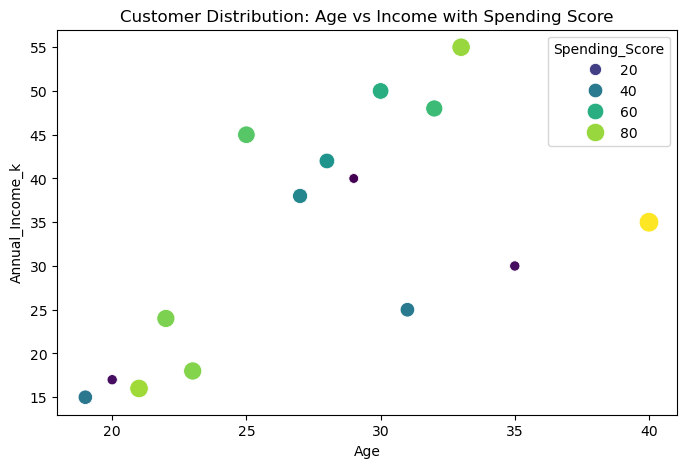

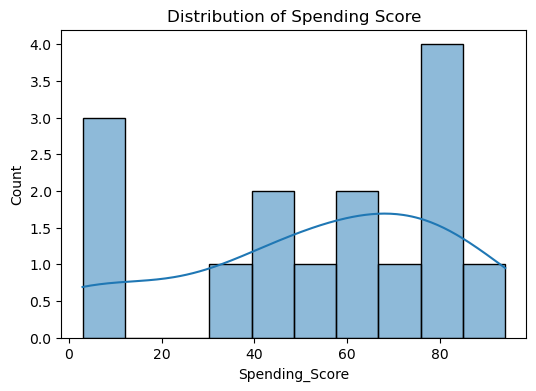

In [4]:
#  Explore Data
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Annual_Income_k', hue='Spending_Score', size='Spending_Score', palette='viridis', data=df, sizes=(50,200))
plt.title("Customer Distribution: Age vs Income with Spending Score")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Spending_Score'], bins=10, kde=True)
plt.title("Distribution of Spending Score")
plt.show()

In [5]:
# Preprocess Data (Scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [6]:
#  Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can try 3-5 clusters
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [7]:
# Add cluster labels to original dataframe
df['Cluster'] = kmeans.labels_
print("\nData with Cluster Labels:")
print(df)


Data with Cluster Labels:
    Age  Annual_Income_k  Spending_Score  Cluster
0    19               15              39        2
1    21               16              81        0
2    20               17               6        2
3    23               18              77        0
4    31               25              40        1
5    22               24              76        0
6    35               30               6        1
7    40               35              94        1
8    29               40               3        1
9    30               50              60        1
10   25               45              70        1
11   32               48              65        1
12   28               42              50        1
13   27               38              45        1
14   33               55              80        1


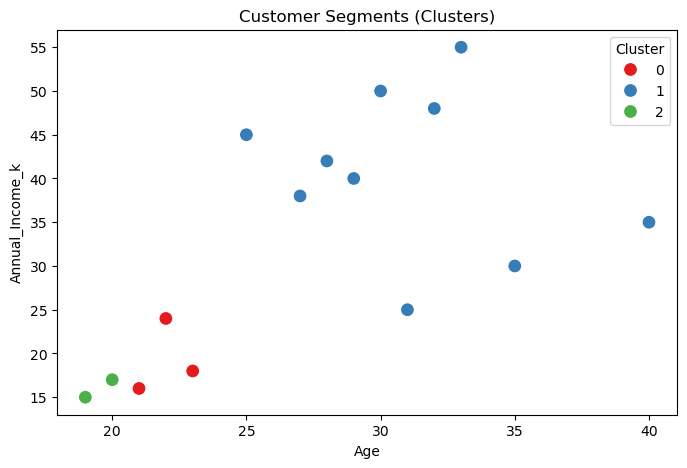

In [8]:
# Visualize Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Annual_Income_k', hue='Cluster', palette='Set1', data=df, s=100)
plt.title("Customer Segments (Clusters)")
plt.show()

In [9]:
# Predict cluster for a new customer
new_customer = pd.DataFrame([[30, 50, 60]], 
                            columns=['Age', 'Annual_Income_k', 'Spending_Score'])

new_customer_scaled = scaler.transform(new_customer)
predicted_cluster = kmeans.predict(new_customer_scaled)
print(f"New customer belongs to Cluster: {predicted_cluster[0]}")


New customer belongs to Cluster: 1
